# Bibliotecas

In [1]:
#========================={ BIBIOTECAS }==========================
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Base

In [2]:
#========================={ BASES }==========================
# Diretório base onde os arquivos CSV estão localizados
base_diretório = Path(os.getcwd())
diretório_princapl = base_diretório.parent
caminho = diretório_princapl / 'Bases'

# Definir caminho dos arquivos da Bitcoin e da BNB, pois são as duas que vamos rodar (definido pelo teste de similaridade das bases)
arquivos = {
    'Bitcoin': caminho / 'Bitcoin Historical Data.csv',
    'Ethereum': caminho / 'Ethereum Historical Data.csv',
    'BNB': caminho / 'BNB Historical Data.csv',
    'Solana': caminho / 'Solana Historical Data.csv',
}

# Ler o arquivo ano.txt e pegar o ano
with open(diretório_princapl/'data'/'ano.txt', 'r') as file:
    ano = int(file.read().strip())

# Função para tratar os dados de cada criptomoeda
def tratar_dados_cripto(caminho_csv):
    # Ler o arquivo CSV
    acao = pd.read_csv(caminho_csv)
    acao['Date'] = pd.to_datetime(acao['Date'])

    return acao

# Aplicar a função para cada criptomoeda e armazenar o resultado em um DataFrame
base_bitcoin = tratar_dados_cripto(arquivos['Bitcoin'])
base_ethereum = tratar_dados_cripto(arquivos['Ethereum'])
base_bnb = tratar_dados_cripto(arquivos['BNB'])
base_solana = tratar_dados_cripto(arquivos['Solana'])


In [3]:
base_bitcoin

,Date,Price,Open,High,Low,Volume,Change %
0,2017-01-01,995.4,963.4,1001.6,956.1,41150.0,3.33
1,2017-01-02,1017.0,995.4,1031.7,990.2,64950.0,2.17
2,2017-01-03,1033.3,1017.0,1035.5,1006.5,54790.0,1.60
3,2017-01-04,1135.4,1033.3,1148.5,1022.3,156270.0,9.88
4,2017-01-05,989.3,1135.4,1150.6,874.5,240010.0,-12.86
...,...,...,...,...,...,...,...
2881,2024-11-21,98374.5,94308.7,98937.2,94063.8,179070.0,4.32
2882,2024-11-22,98929.7,98381.2,99617.4,97182.2,132230.0,0.56
2883,2024-11-23,97699.0,98927.2,98927.2,97180.9,72170.0,-1.24
2884,2024-11-24,97935.2,97696.4,98552.6,95765.4,77040.0,0.24


# Algoritmo

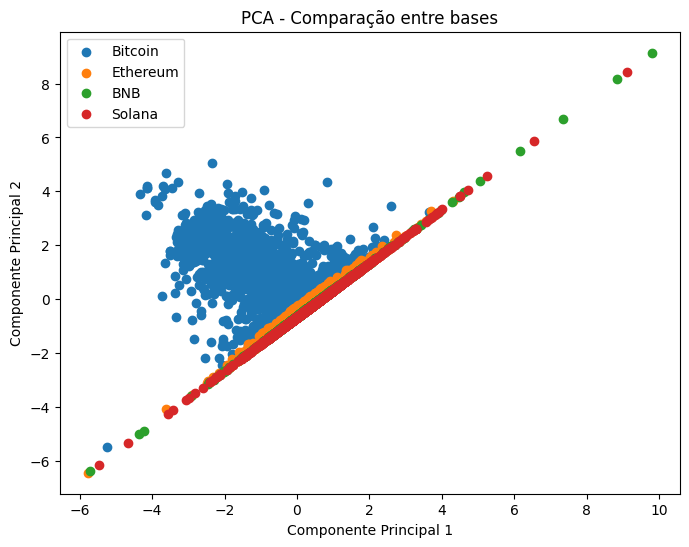

In [4]:
# Criar coluna para identificar de qual base o dado é
base_bitcoin['Base'] = 'Bitcoin'
base_ethereum['Base'] = 'Ethereum'
base_bnb['Base'] = 'BNB'
base_solana['Base'] = 'Solana'

colunas_pca = ['Price', 'Change %']

# Concatenar os DataFrames
dados_concatenados = pd.concat([base_bitcoin, base_ethereum, base_bnb, base_solana], ignore_index=True)

dados_concatenados = dados_concatenados.dropna(subset=colunas_pca)

scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_concatenados[colunas_pca])

pca = PCA(n_components=2)  # reduzir para 2 componentes principais
componentes_principais = pca.fit_transform(dados_padronizados)

# Criar um DataFrame com os componentes principais
df_componentes = pd.DataFrame(data=componentes_principais, columns=['PC1', 'PC2'])
df_componentes['Base'] = dados_concatenados['Base'].values

plt.figure(figsize=(8, 6))
for base in df_componentes['Base'].unique():
    indices = df_componentes['Base'] == base
    plt.scatter(df_componentes.loc[indices, 'PC1'], df_componentes.loc[indices, 'PC2'], label=base)

plt.title('PCA - Comparação entre bases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

